# **Loan Default Prediction**

## **Context**


A major proportion of retail bank profit comes from interests in the form of home loans. These loans
are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as
bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to
be judicious while approving loans for their customer base.
The approval process for the loans is multifaceted. Through this process, the bank tries to check the
creditworthiness of the applicant on the basis of a manual study of various aspects of the
application. The entire process is not only effort-intensive but also prone to wrong
judgment/approval owing to human error and biases.
There have been attempts by many banks to automate this process by using heuristics. But with the
advent of data science and machine learning, the focus has shifted to building machines that can
learn this approval process and make it free of biases and more efficient. At the same time, one
important thing to keep in mind is to make sure that the machine does not learn the biases that
previously crept in because of the human approval process.

## **Problem Statement**


A bank's consumer credit department aims to simplify the decision-making process for home equity
lines of credit to be accepted. To do this, they will adopt the Equal Credit Opportunity Act's
guidelines to establish an empirically derived and statistically sound model for credit scoring. The
model will be based on the data obtained via the existing loan underwriting process from recent
applicants who have been given credit. The model will be built from predictive modeling techniques,
but the model created must be interpretable enough to provide a justification for any adverse
behavior (rejections).

## **Objective**


Build a classification model to predict clients who are likely to default on their loan and give
recommendations to the bank on the important features to consider while approving a loan.

## **Data Dictionary**

The Home Equity dataset (HMEQ) contains baseline and loan performance information for recent
home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has
ultimately defaulted or has been severely delinquent. There are 12 input variables registered for each
applicant.

● BAD: 1 = Client defaulted on loan, 0 = loan repaid

● LOAN: Amount of loan approved

● MORTDUE: Amount due on the existing mortgage

● VALUE: Current value of the property

● REASON: Reason for the loan request (HomeImp = home improvement, DebtCon= debt
consolidation which means taking out a new loan to pay off other liabilities and consumer
debts)

● JOB: The type of job that loan applicant has such as manager, self, etc.

● YOJ: Years at present job

● DEROG: Number of major derogatory reports (which indicates serious delinquency or late
payments).

● DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a
borrower does not make the minimum required payments 30 to 60 days past the day on
which the payments were due)

● CLAGE: Age of the oldest credit line in months

● NINQ: Number of recent credit inquiries

● CLNO: Number of existing credit lines

● DEBTINC: Debt-to-income ratio (all monthly debt payments divided by gross monthly
income. This number is one of the ways lenders measure a borrower’s ability to manage the
monthly payments to repay the money they plan to borrow)
Proprietary content.

## **Importing necessary libraries and data**


In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# To supress warnings

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import numpy as np                                      # Import numpy
import pandas as pd                                     # Import pandas

# Libraries to help with data visualization

import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib 
sns.set()                                               # Background style for plots

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# to suppress scientifiv notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Mount Google drive to access the dataset in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
path_csv = '/content/drive/MyDrive/03.Capstone Project/Milestone 1/hmeq.csv'

# Complete the code to read the dataset
loan = pd.read_csv(path_csv)       

In [4]:
# create a copy to avoid any changes to original data
data = loan.copy()

## **Overview of the Dataset**

### **Viewing the first 5 rows of the data**

In [5]:
data.head(5)    

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000,39025.000,HomeImp,Other,10.500,0.000,0.000,94.367,1.000,9.000,NaN
1,1,1300,70053.000,68400.000,HomeImp,Other,7.000,0.000,2.000,121.833,0.000,14.000,NaN
2,1,1500,13500.000,16700.000,HomeImp,Other,4.000,0.000,0.000,149.467,1.000,10.000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.000,112000.000,HomeImp,Office,3.000,0.000,0.000,93.333,0.000,14.000,NaN


### **Viewing the last 5 rows of the data**

In [6]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.000,90185.000,DebtCon,Other,16.000,0.000,0.000,221.809,0.000,16.000,36.112
5956,0,89000,54576.000,92937.000,DebtCon,Other,16.000,0.000,0.000,208.692,0.000,15.000,35.860
5957,0,89200,54045.000,92924.000,DebtCon,Other,15.000,0.000,0.000,212.280,0.000,15.000,35.557
5958,0,89800,50370.000,91861.000,DebtCon,Other,14.000,0.000,0.000,213.893,0.000,16.000,34.341
5959,0,89900,48811.000,88934.000,DebtCon,Other,15.000,0.000,0.000,219.601,0.000,16.000,34.572


### **Understand the shape of the dataset**

In [7]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5960 rows and 13 columns.


### **Check the data types of the columns for the dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observation:**

* Most of the columns are numeric except REASON and JOB which are object type.
* Two numerical columns are int64 and the rest float64.
* Memomry usage not so high but maybe is better if we converte the object type values to categorical.


In [9]:
# observing the unique values per column
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [10]:
# as soon as those 2 object dtypes have less unique values we convert them to category
data["REASON"] = data["REASON"].astype("category")
data["JOB"] = data["JOB"].astype("category")

In [11]:
# Check the data types of the columns of the dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.3 KB


**Observation:**

* Memomy usage after converting the two object type columns is reduced.

In [12]:
# Code to check duplicate entries in the data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5955    False
5956    False
5957    False
5958    False
5959    False
Length: 5960, dtype: bool

In [13]:
# checking for duplicate values
print(f"There are {data.duplicated().sum()} duplicated values.")

There are 0 duplicated values.


In [14]:
#Searching for Missing values
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**Observation**

* unfortunatelly there are a lot of miising values at the dataset and we need to find a strategy how to handle them.

In [15]:
# checking the percentage of missing values per column
data.isnull().sum() * 100 / data.shape[0]

BAD        0.000
LOAN       0.000
MORTDUE    8.691
VALUE      1.879
REASON     4.228
JOB        4.681
YOJ        8.641
DEROG     11.879
DELINQ     9.732
CLAGE      5.168
NINQ       8.557
CLNO       3.725
DEBTINC   21.258
dtype: float64

* since there is **not** more than 50% of a column with missing values
then i keep continue without delete or droping.


### **Statistics on Numerical and Categorical Columns**

In [16]:
# a statistical summary of the numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.000,0.199,0.400,0.000,0.000,0.000,0.000,1.000
LOAN,5960.000,18607.970,11207.480,1100.000,11100.000,16300.000,23300.000,89900.000
MORTDUE,5442.000,73760.817,44457.609,2063.000,46276.000,65019.000,91488.000,399550.000
VALUE,5848.000,101776.049,57385.775,8000.000,66075.500,89235.500,119824.250,855909.000
YOJ,5445.000,8.922,7.574,0.000,3.000,7.000,13.000,41.000
DEROG,5252.000,0.255,0.846,0.000,0.000,0.000,0.000,10.000
DELINQ,5380.000,0.449,1.127,0.000,0.000,0.000,0.000,15.000
CLAGE,5652.000,179.766,85.810,0.000,115.117,173.467,231.562,1168.234
NINQ,5450.000,1.186,1.729,0.000,0.000,1.000,2.000,17.000
CLNO,5738.000,21.296,10.139,0.000,15.000,20.000,26.000,71.000


**Observations:**

* As expected the first 2 columns have no missing values as they reprecent the category of each client (Default/Not default) and the amount of the approved loan.
* Some values seems to be unusual but we have further to investigate if they are real.
* It looks like we will have at many points enough outliers on both sides.

In [17]:
# filtering object type columns
cat_columns = data.describe(include=["category"]).columns
cat_columns

Index(['REASON', 'JOB'], dtype='object')

In [18]:
# statistical summary for categorical values
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
**************************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
**************************************************


**Observation:**

* 2/3 of the reason to ask for a loan was to cover other liabilities and
* approximately the 1/3 of the reasons are for home improvement.
* We can find 5 categories of job description and 1 about all the rest (Others) which has the majority of the dataset.
* In a specific sector seems that the most loans went in the ProfExe value.

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Univariate Analysis**

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [21]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

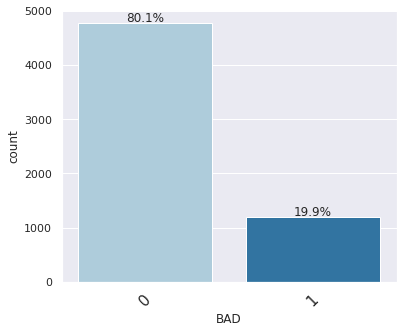

In [23]:
labeled_barplot(data, "BAD", perc=True, n=5)

* in the whole dataset round 80% refers to client that repaid the loan 
* and 20% from clients that defaulted. 

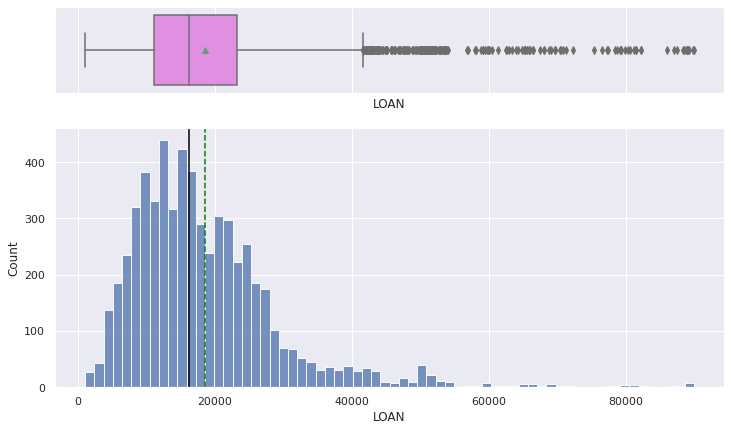

In [24]:
histogram_boxplot(
    data, "LOAN"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

* The distribution of LOAN is right -skeweed and have outliers on one side.
* The average age of the oldest credit is aprox. 18000.
* The highest loan is around 90000.

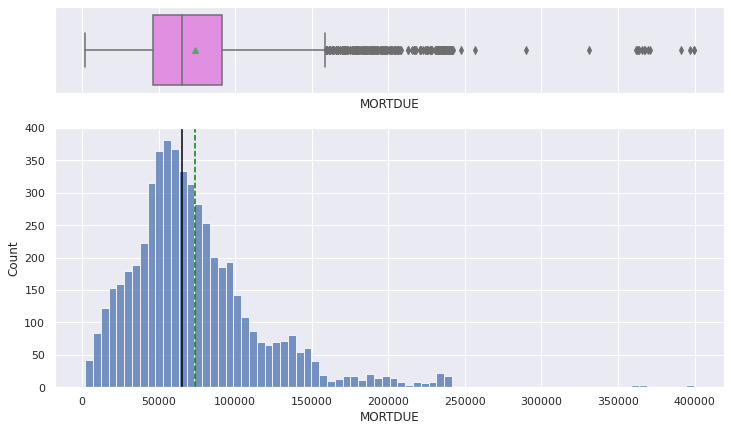

In [25]:
histogram_boxplot(
    data, "MORTDUE"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

**Observations**

* It's righ-skewed distribution
* The data set has a symmetrical distribution
* Outliers only from one side
* Average mortgage price round 60000 and highest round 400000

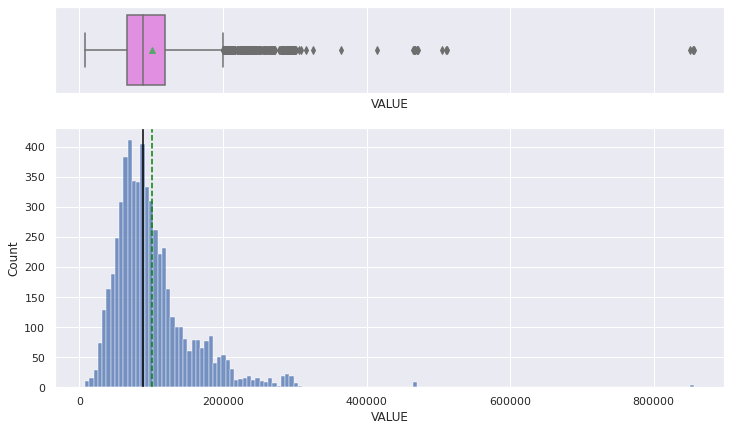

In [26]:
    histogram_boxplot(
    data, "VALUE"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

**Observations**

* It's right-skewed as by mortdue 
* The data set has a symmetrical distribution
* Outliers on one side
* Average value 10000 and highet more than 80000

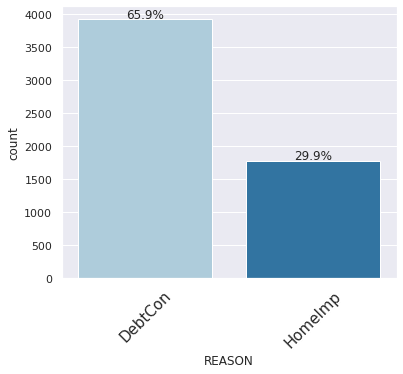

In [27]:
labeled_barplot(data, "REASON", perc=True, n=5)

* Almost 66% regarding loans needed for Debt consolidation
* 30% for loan request about home improvement

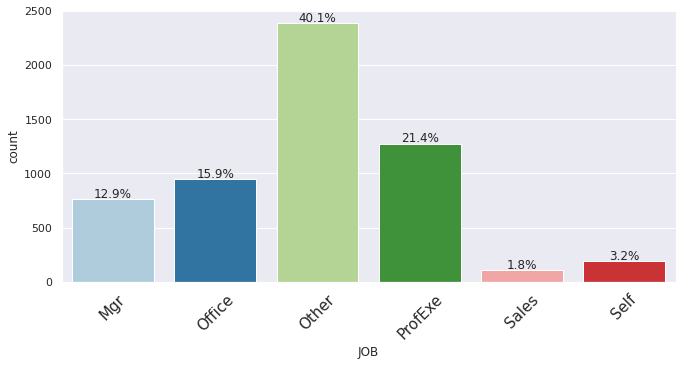

In [28]:
labeled_barplot(data, "JOB", perc=True, n=10)

* As we explained previously the 40.1% of the clienteke regarding loans taken from people from other jobs
* 21.4% regarding clients  experience professionals
* 15.9% from people that working in offices
* 12.9% from clients with managerial position
* 3.2% were self employed
* and 1.8% came from sales sector

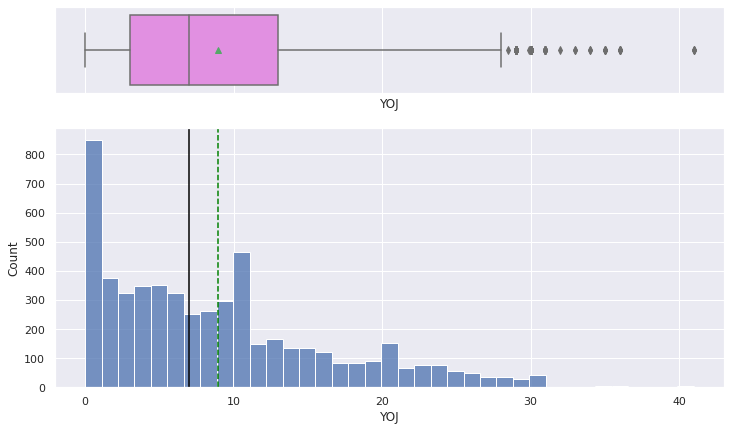

In [29]:
histogram_boxplot(
    data, "YOJ"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

* The distribution of YOJ is right-skeweed and have some outliers.
* The average years at present job is 7 years.
* Maximum value is 42.
* less than 1 year is the majority of the datset.

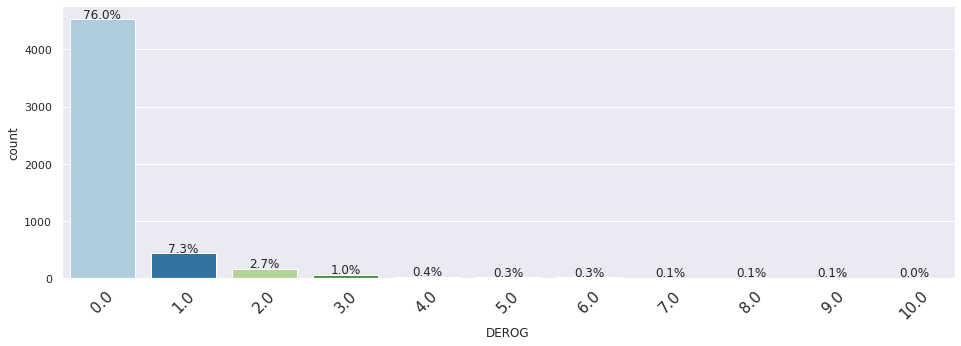

In [30]:
labeled_barplot(data, "DEROG", perc=True, n=15)

* 76% of the clients never derogatory reports
* a 7.3% had once 
* 2.7% had twice
* More than 3 times is about the 2% of whole dataset

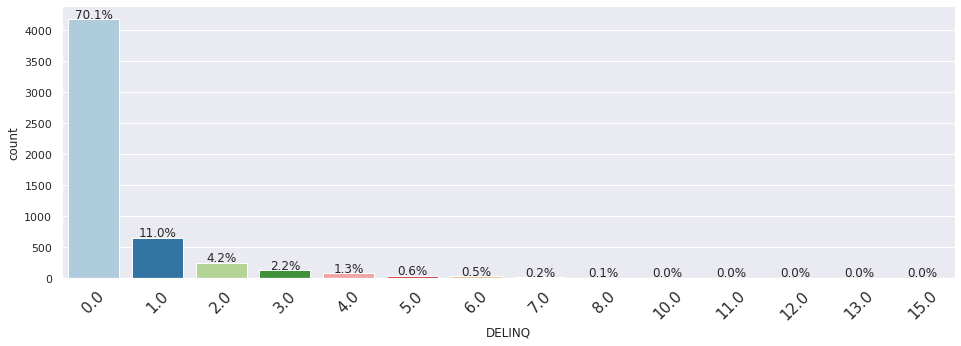

In [31]:
labeled_barplot(data, "DELINQ", perc=True, n=15)

* 70% of the clients never had delinquent credit lines
* a 11% had once  
* 4.2% had twice
* 3 times is about the 5% of whole dataset

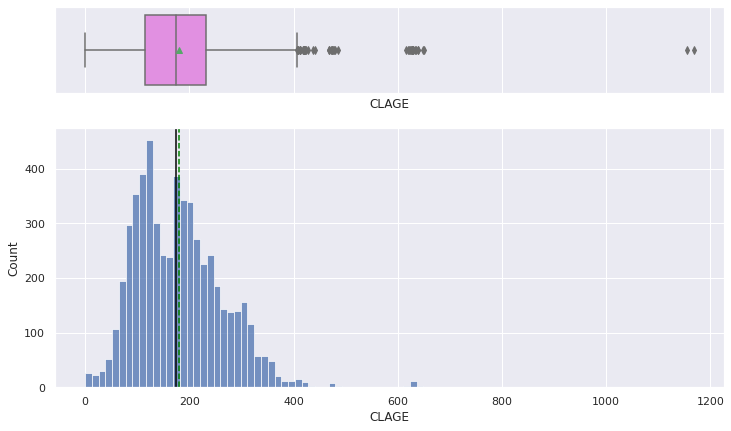

In [32]:
histogram_boxplot(
    data, "CLAGE"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

* The distribution of CLAGE is right -skeweed and have some outliers.
* The average age of the oldest credit is aprox. 180 months.
* Some loans defined in ouliers are round 1100 months and need to observe them.


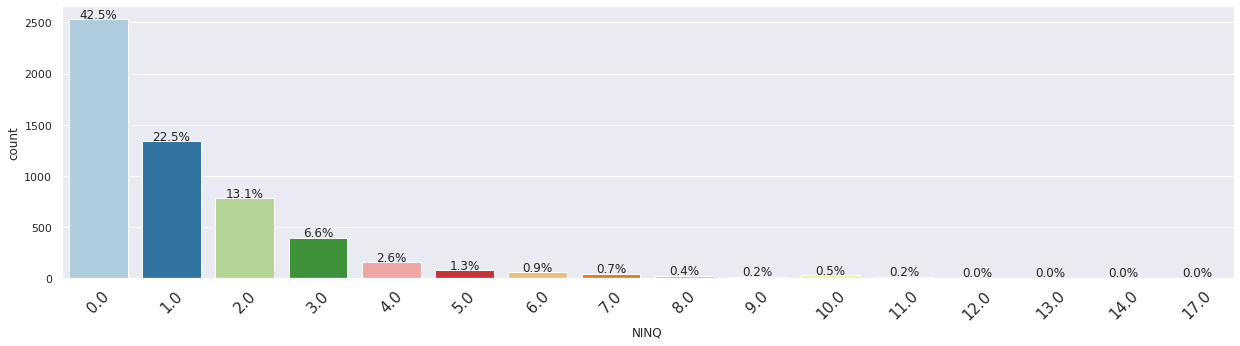

In [33]:
labeled_barplot(data, "NINQ", perc=True, n=20)

* 42.5% didn't have any recent credit inquiries
* 22.5% of the dataset have one
* 13.1% have two.
* More than 12 the percentage is almost 0%

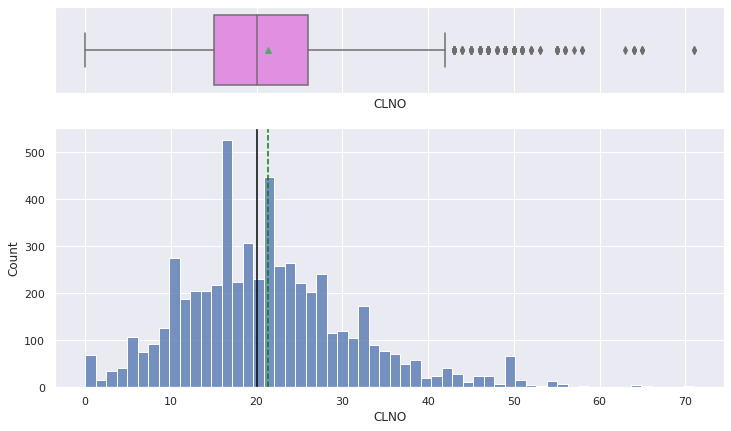

In [34]:
histogram_boxplot(
    data, "CLNO"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

* The distribution of CLNO is right -skeweed and have some outliers only on one side.
* It is a simmetrical distribution.
* The average number of existing credit lines is 20.


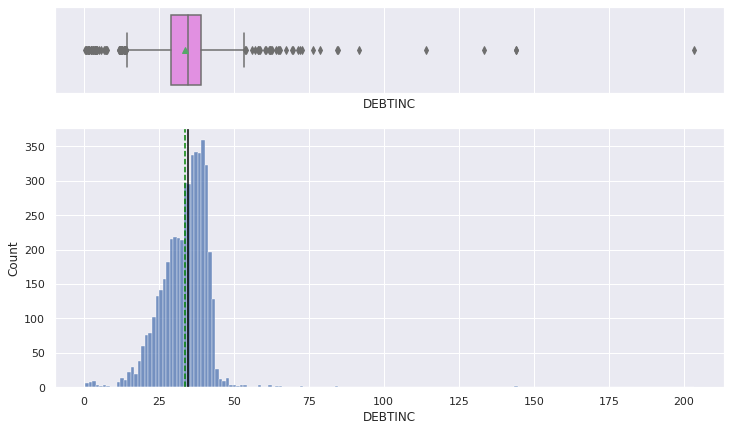

In [35]:
histogram_boxplot(
    data, "DEBTINC"
)  ## Complete the code to create histogram_boxplot for 'normalized_used_price'

* The distribution of DEBTINC is right -skeweed and have many outliers on both sides.
* The average debt to income ration is 35.
* Some outliers need to be investigate as they have very high values.

### **Bivariate Analysis**

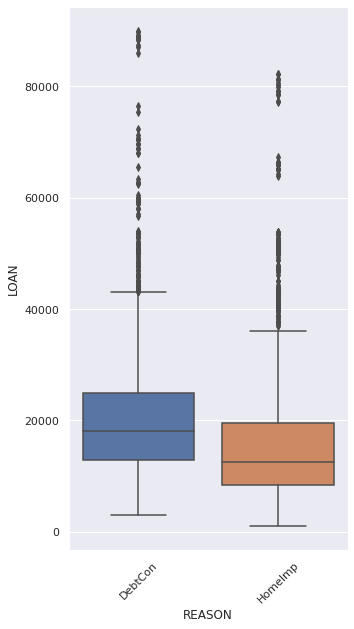

In [36]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=data, x="REASON", y="LOAN")
plt.xticks(rotation=45)

plt.show()

BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


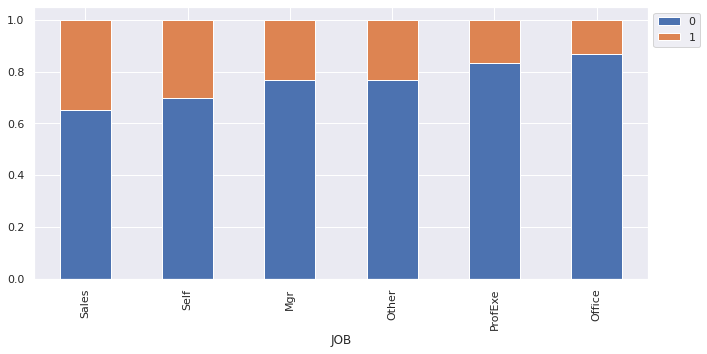

In [37]:
stacked_barplot(data, "JOB", "BAD")

* Suprisingly the clients with lower salary as they have office position seem to be better by paying back their loan.
* From the other hand percentage of clients with managerial positions who repaid is 78%.
* Highest percentage of defaulters by far clients in sales sector. 

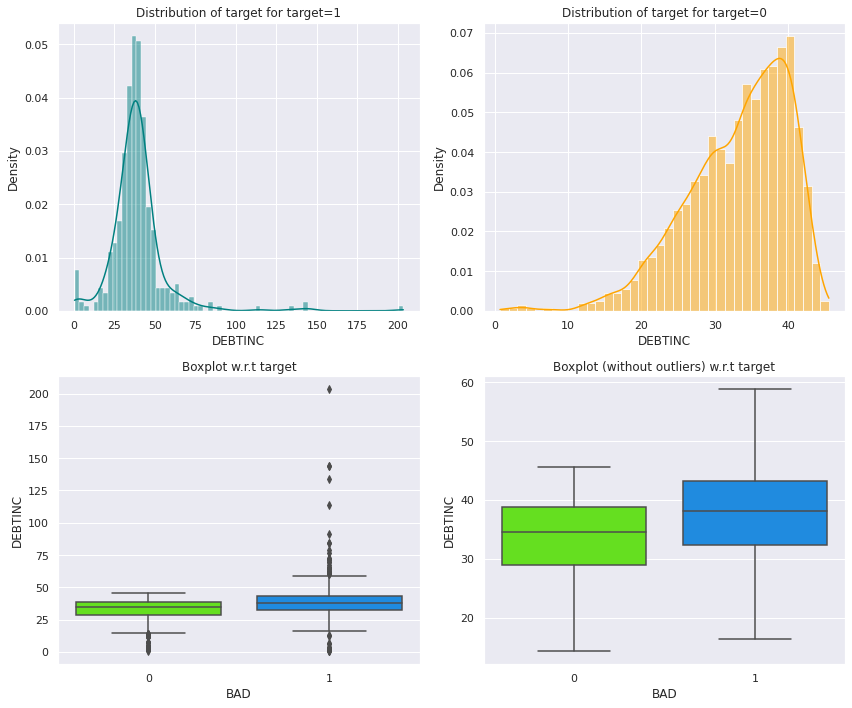

In [38]:
distribution_plot_wrt_target(data, "DEBTINC", "BAD")

* At this diagram is important to see the difference at the distribution for each category of clients. The lowest the ratio most possible for a client to have repaid back the loan.
* Also at the boxplot we can observe that the average value of the defaulters is equal with the Q3 value of the non defaulters.

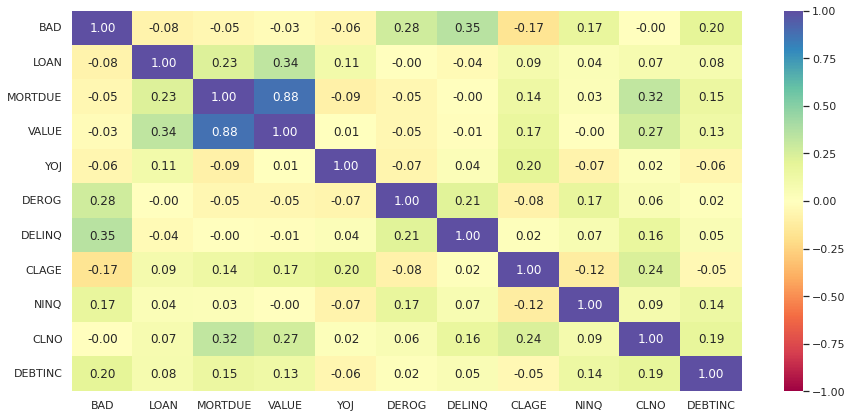

In [39]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
#numeric_columns.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**

* There's a very strong correlation between the MORTDUE and VALUE as expected.
* There's a positive correlation between VALUE and LOAN. 
* There's a positive correlation between the BAD and DELINQ as with DEROG too. 
* There's a positive correlation between MORTDUE and CLNO. 


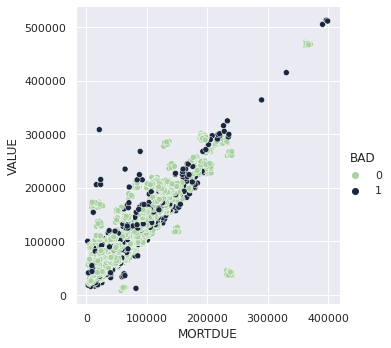

In [40]:
sns.relplot(
    data=data,
    x="MORTDUE", y="VALUE",
    hue="BAD", palette="ch:r=-.5,l=.75"
)

* Here we can see better, after we saw the correlation matrix, how related are the both values MORTDUE and VALUE compare to BAD.

## **Data Preparation**

**A. Missing value treatment (if needed)**

**B. Feature engineering**

**C. Outlier detection and treatment (if needed)**

**D. Preparing data for modeling**

**E. Any other preprocessing steps (if needed)**

In [41]:
# Creating a second copy
 
data1=data.copy()

### **Missing-Value Treatment and Feature Engineering**

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.


-----------------------------------------------------------

* Converting unnecessary float values to integer.
* Rounding float columns with 2 digits after the comma.
* Checking for missing values or junk values in dataset.


**Feature Engineering**


**Feature selection aims to drop those redundant columns which contain little useful information and reduce the number of input features when developing an effective model. In our case we will not proceed in that step.**

In [42]:
# We need to pass numerical values for each catergorical column for KNN imputation so we will label encode them

given_reason = {'HomeImp':0,'DebtCon':1}
data1['REASON'] = data1['REASON'].map(given_reason).astype('Int32')

given_job = {'Other':0, 'ProfExe':1,'Office':2, 'Mgr':3,'Self':4,'Sales':5}  
data1['JOB'] = data1['JOB'].map(given_job).astype('Int32')

In [43]:
imputer = KNNImputer(n_neighbors=5)

In [44]:
data1=pd.DataFrame(imputer.fit_transform(data1),columns=data1.columns)

In [45]:
# converting Float values to Int64 as from Dataset they don't need to be float
# converting to Int64 with respect to domain, help us in next step by KNN imputing to receive correct form of missing values .

data1['DEROG'] = data1['DEROG'].astype('int64')
data1['DELINQ'] = data1['DELINQ'].astype('int64')
data1['CLAGE'] = data1['CLAGE'].astype('int64')
data1['NINQ'] = data1['NINQ'].astype('int64')
data1['CLNO'] = data1['CLNO'].astype('int64')
data1['LOAN'] = data1['LOAN'].astype('int64')
data1['JOB'] = data1['JOB'].astype('int64')
data1['BAD'] = data1['BAD'].astype('int64')
data1['REASON'] = data1['REASON'].astype('int64')

# Float values rounded with 2 digits

data1["DEBTINC"] = data1["DEBTINC"].round(2)
data1["MORTDUE"] = data1["MORTDUE"].round(2)
data1["VALUE"] = data1["VALUE"].round(2)
data1["YOJ"] = data1["YOJ"].round(2)


In [46]:
# Viewing a sample of conversion

data1.sample(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5643,0,39300,27324.000,73924.000,1,1,6.000,0,0,190,1,18,25.050
2293,0,13900,77007.000,96718.000,1,1,8.000,2,0,183,0,30,26.430
4080,0,21300,68544.000,89908.000,1,0,3.000,0,0,101,2,30,32.830
4970,0,26300,58369.000,88124.000,1,0,7.000,0,0,234,1,20,37.160
2590,1,15000,6124.000,35000.000,0,0,1.500,1,0,91,0,5,28.770


In [47]:
data1.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

* No missing values 
* No junk values

### **Exploratory Data Analysis (EDA)**

* Extra data analysis after the data treatment.
* On some points we have small differences.

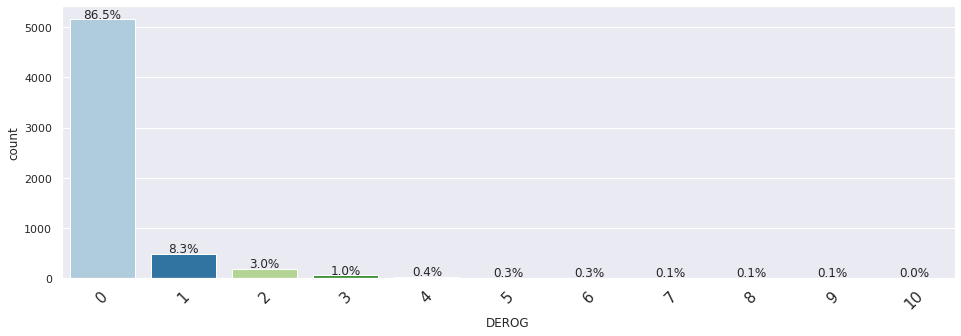

In [48]:
labeled_barplot(data1, "DEROG", perc=True, n=15)

* The percentages of "0" and "1" are increased.
* Percentage of "2" dicreased.
* Percentages from other values not changed. 

BAD       0     1   All
DEROG                  
All    4771  1189  5960
0      4328   829  5157
1       314   178   492
2        96    85   181
3        15    43    58
4         5    18    23
6         5    10    15
7         0     8     8
5         8     7    15
8         0     6     6
9         0     3     3
10        0     2     2
------------------------------------------------------------------------------------------------------------------------


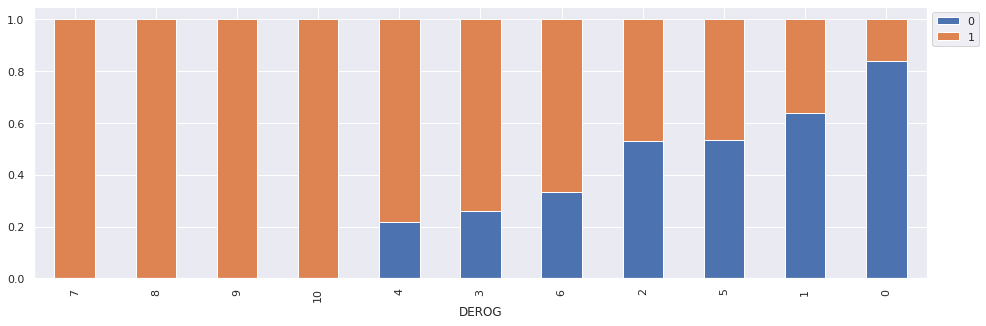

In [49]:
stacked_barplot(data1, "DEROG", "BAD")

**Observation**

* After 7 number of major derogatory reports is 100% sure that the client will default.
* Without any, is around 15% to default.
* Suprosingly, less possibilities to default when someone had 5 reports or 6, from someone with 3 or 4.


BAD        0     1   All
DELINQ                  
All     4771  1189  5960
0       3841   612  4453
1        565   237   802
2        243   132   375
3         80    79   159
4         35    46    81
5          7    31    38
6          0    27    27
7          0    13    13
8          0     5     5
10         0     2     2
11         0     2     2
12         0     1     1
13         0     1     1
15         0     1     1
------------------------------------------------------------------------------------------------------------------------


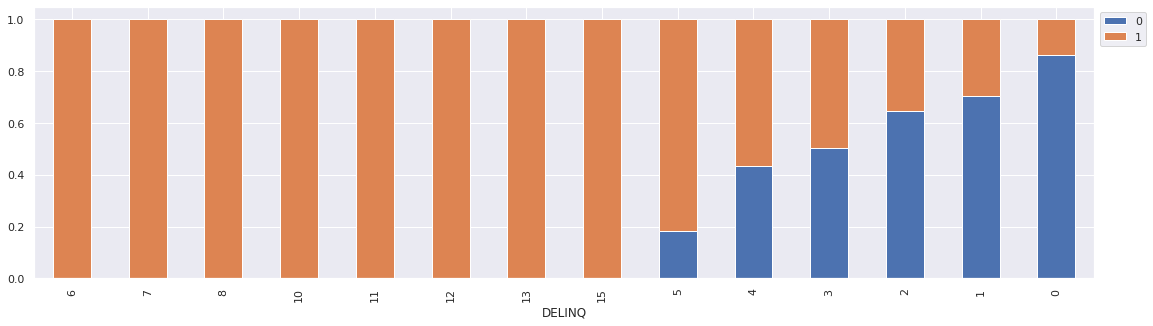

In [50]:
stacked_barplot(data1, "DELINQ", "BAD")

**Observation**

* After 6 number of deliquent credit line is 100% sure that the client will default.
* Without any, is around 10% to default.
* Accordingly, less the number of deliquent credit line (1 to 5), less possibility to default.


### **Outlier detection and treatment**

In [51]:
Q1 = data1.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data1.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [52]:
# Let's find the percentage of outliers, in each column of the data, using IQR.

((data1.select_dtypes(include=['float64','int64'])<lower) | (data1.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

BAD       19.950
LOAN       4.295
MORTDUE    4.111
VALUE      5.671
REASON     0.000
JOB        0.000
YOJ        1.527
DEROG     13.473
DELINQ     5.537
CLAGE      1.057
NINQ       2.970
CLNO       3.674
DEBTINC    1.661
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers.

### **Preparing data for modeling**

In [53]:
# Droping target value

X = data1.drop(['BAD'],axis=1)
y = data1['BAD']

In [54]:
# Splitting data into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(4172, 12) (1788, 12)


* Our Train Model consists of 4172 rows and 12 columns.
* Our Test Model consists of 1788 rows and 12 columns.

Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

### **Encoding categorical varaibles**

In [55]:
#Checking that no column has missing values in train or test sets

print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64
------------------------------
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


* All missing values have been treated.
* Let's inverse map the encoded values.

In [56]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [57]:
inverse_mapping(given_reason,'REASON')
inverse_mapping(given_job,'JOB')

* Checking inverse mapped values/categories.

In [58]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

DebtCon    2783
HomeImp    1389
Name: REASON, dtype: int64
******************************
Other      1786
ProfExe     969
Office      671
Mgr         534
Self        136
Sales        76
Name: JOB, dtype: int64
******************************


In [59]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

DebtCon    2783
HomeImp    1389
Name: REASON, dtype: int64
******************************
Other      1786
ProfExe     969
Office      671
Mgr         534
Self        136
Sales        76
Name: JOB, dtype: int64
******************************


* Inverse mapping returned original labels.

In [60]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(4172, 16) (1788, 16)


* After encoding there are 16 columns.

In [61]:
X_train.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other',
       'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

## **Building the model**

### **Model evaluation criterion**


#### Model can make wrong predictions as:
1. Predicting a customer will default and the customer doesn't default
2. Predicting a customer will not default and the customer defaults

#### Which case is more important? 
* Predicting that customer will not default but he defaults i.e. losing the whole or part of the amount was given for loan. 

#### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can keep its profits by getting back the total amount of the loan granted plus interest. In addition, not to lose customers by refusing to grant a loan.

**First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [62]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [63]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Logistic Regression** 

In [64]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

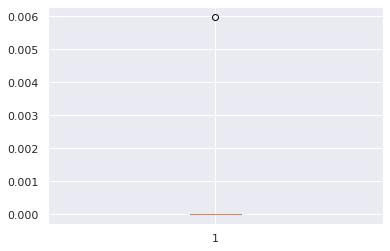

In [65]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.000 to 0.006 recall. That's looks very bad.
* Let's check the performance on test data.

Accuracy on training set :  0.8010546500479386
Accuracy on test set :  0.8014541387024608
Recall on training set :  0.014423076923076924
Recall on test set :  0.0056022408963585435
Precision on training set :  0.5454545454545454
Precision on test set :  1.0


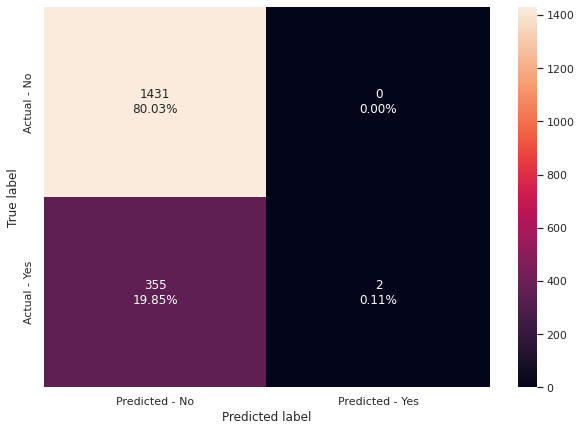

In [66]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is extremely low, we can try oversampling (increase training data) to see if the model performance can be improved.

### **Oversampling train data using SMOTE**

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 832
Before UpSampling, counts of label 'No': 3340 

After UpSampling, counts of label 'Yes': 3340
After UpSampling, counts of label 'No': 3340 

After UpSampling, the shape of train_X: (6680, 16)
After UpSampling, the shape of train_y: (6680,) 



### **Logistic Regression on oversampled data**

In [69]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

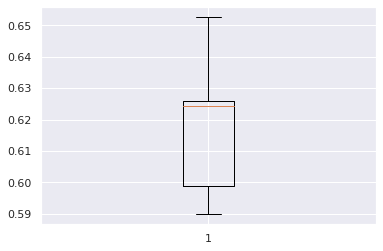

In [70]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.59 to 0.65, which is an improvement from the previous model
* The variability in the model performance has also decreased.
* Let's check the performance on the test set.

Accuracy on training set :  0.6169161676646706
Accuracy on test set :  0.6023489932885906
Recall on training set :  0.6266467065868263
Recall on test set :  0.5518207282913166
Precision on training set :  0.6146842878120411
Precision on test set :  0.26336898395721925


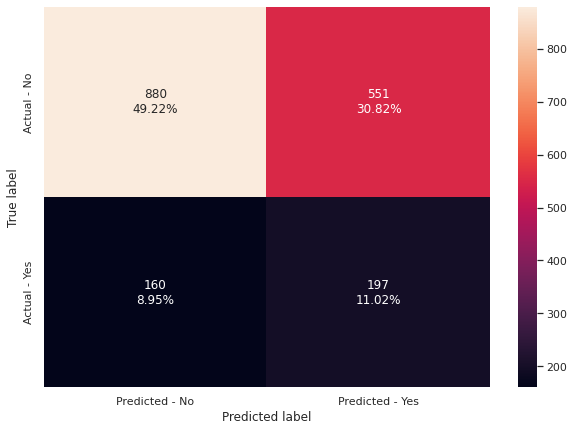

In [71]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Performance of the model increased
* Lets try:

  a) Regularization to see if overfitting in precision can be reduced

  b) Undersampling the train to handle the imbalance between classes and check the model performance.

### **Regularization**


In [72]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.5128742514970059
Accuracy on test set :  0.6879194630872483
Recall on training set :  0.20808383233532934
Recall on test set :  0.226890756302521
Precision on training set :  0.5329754601226994
Precision on test set :  0.2231404958677686


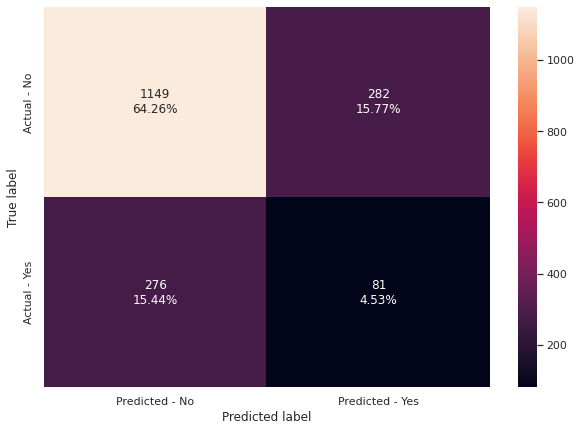

In [73]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* After regularization, the recall has also reduced.
* Let's try undersampling now.


### **Undersampling train data using UnderSampling**

In [74]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [75]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 832
Before Under Sampling, counts of label 'No': 3340 

After Under Sampling, counts of label 'Yes': 832
After Under Sampling, counts of label 'No': 832 

After Under Sampling, the shape of train_X: (1664, 16)
After Under Sampling, the shape of train_y: (1664,) 



### **Logistic Regression on undersampled data**

In [76]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

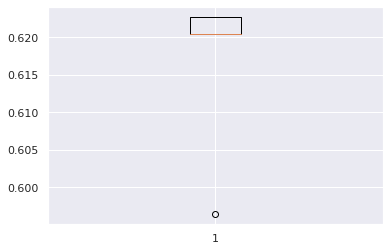

In [77]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [78]:
cv_result_under

array([0.62048193, 0.59638554, 0.62275449, 0.62275449, 0.62048193])

* Performance of model on training set varies between 0.59 to 0.62, which is an improvement from the initial model(without oversampling)
* The variability in results is quite large as compared to the oversampled model.
* Let's check the performance on the test set.

Accuracy on training set :  0.5450721153846154
Accuracy on test set :  0.7253914988814317
Recall on training set :  0.2644230769230769
Recall on test set :  0.22408963585434175
Precision on training set :  0.6027397260273972
Precision on test set :  0.272108843537415


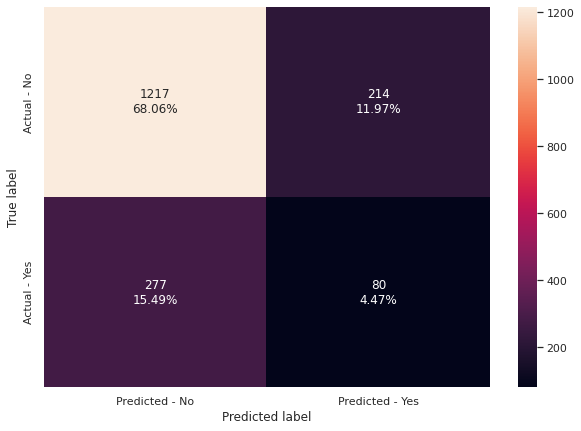

In [79]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Model has given a generalized performance on training and test set.
* Model performance has improved using downsampling - Logistic regression is now able to differentiate well between positive and negative classes.
* It would be better to find other methods to increase Recall.

**We will proceed with the original data (data before over or under sampling) as Logistic Regression model gave a generalized performance on it.**

## **Bagging and Boosting**

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validator` provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [80]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1,)),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 58.77353726282375
Bagging: 51.201212033763795
RF: 52.53156337926556
ADB: 40.03318663877066
GBM: 41.83464396508189
XGB: 39.43366279489215


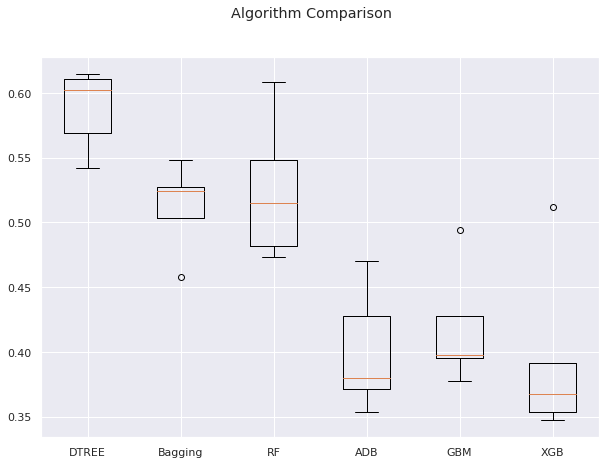

In [81]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that DTREE is giving the highest cross validated recall followed by Random Forest.
- Let's tune the models see if the performance improves. 

## **Hyperparameter Tuning**

#### **GridSearchCV**

In [82]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__max_leaf_nodes': 15, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 7} 
Score: 0.34723324435466413
CPU times: user 10.5 s, sys: 536 ms, total: 11.1 s
Wall time: 27.1 s


In [83]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=5,
        max_leaf_nodes=15,
        random_state=1,
        min_impurity_decrease=0.0001,
        min_samples_leaf=10
    ),
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                                        min_impurity_decrease=0.0001,
                                        min_samples_leaf=10, random_state=1))])

Accuracy on training set :  0.8492329817833174
Accuracy on test set :  0.8338926174496645
Recall on training set :  0.2980769230769231
Recall on test set :  0.2549019607843137
Precision on training set :  0.8464163822525598
Precision on test set :  0.7459016393442623


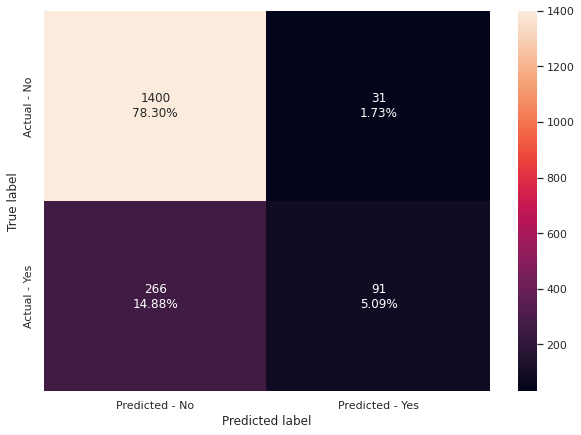

In [84]:
# Calculating different metrics
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- The test recall has increased by ~0,01% as compared to the result from cross validation with default parameters, which is not significant.
- The model is slightly overfitting the training data in terms of recall.
- Still the Logistic Regrassion on Oversampled Data to give better score in recall.

#### **RandomizedSearchCV**

In [85]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {'decisiontreeclassifier__max_depth': np.arange(2,30), 
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10,15],
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 5, 'decisiontreeclassifier__min_impurity_decrease': 0.001, 'decisiontreeclassifier__max_leaf_nodes': 15, 'decisiontreeclassifier__max_depth': 18} with CV score=0.33404516268667483:
CPU times: user 471 ms, sys: 44.8 ms, total: 516 ms
Wall time: 684 ms


In [86]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        max_depth=26,
        max_leaf_nodes=10,
        random_state=1,
        min_impurity_decrease=0.001,
        min_samples_leaf=5
    ),
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=26, max_leaf_nodes=10,
                                        min_impurity_decrease=0.001,
                                        min_samples_leaf=5, random_state=1))])

Accuracy on training set :  0.840124640460211
Accuracy on test set :  0.8338926174496645
Recall on training set :  0.2608173076923077
Recall on test set :  0.23809523809523808
Precision on training set :  0.8066914498141264
Precision on test set :  0.7727272727272727


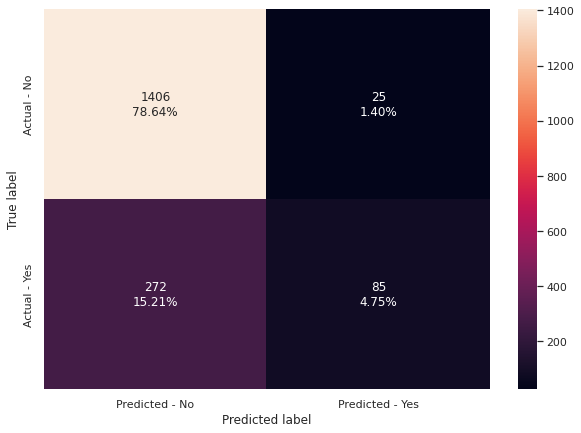

In [87]:
# Calculating different metrics
get_metrics_score(dtree_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The model performance is slightly worst in terms of recall for parameters given by random search. 
- The model is slightly overfitting the data for parameters given by random search.

### **Hyperparameter tuning BaggingClassifier**

#### **GridSearchCV**

In [88]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.9, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 50} 
Score: 0.5276170550465336
CPU times: user 2.15 s, sys: 92.5 ms, total: 2.25 s
Wall time: 14.7 s


In [89]:
# Creating new pipeline with best parameters
bagg_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.8,
        max_samples=0.7,
        random_state=1,
        n_estimators=50,
    ),
)

# Fit the model on training data
bagg_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.8, max_samples=0.7,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9942473633748802
Accuracy on test set :  0.8914988814317674
Recall on training set :  0.9711538461538461
Recall on test set :  0.48739495798319327
Precision on training set :  1.0
Precision on test set :  0.9405405405405406


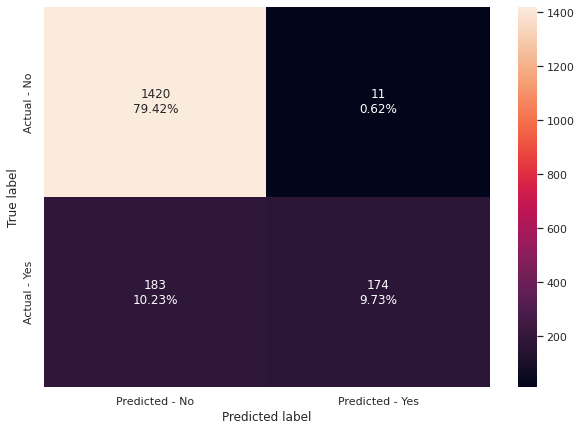

In [90]:
# Calculating different metrics
get_metrics_score(bagg_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bagg_tuned1, y_test)

- The test recall has increased signinficant as compared to the result from cross validation with default parameters in terms of training set.
- However looks very bad in test set.
- The model is overfitting the training data in terms of recall.

#### **RandomizedSearchCV**

In [91]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.9} with CV score=0.5276170550465336:
CPU times: user 1.55 s, sys: 39.2 ms, total: 1.59 s
Wall time: 9.36 s


In [92]:
# Creating new pipeline with best parameters
bagg_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        max_features=0.8,
        random_state=1,
        max_samples=0.7,
        n_estimators=50
    ),
)

# Fit the model on training data
bagg_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.8, max_samples=0.7,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9942473633748802
Accuracy on test set :  0.8914988814317674
Recall on training set :  0.9711538461538461
Recall on test set :  0.48739495798319327
Precision on training set :  1.0
Precision on test set :  0.9405405405405406


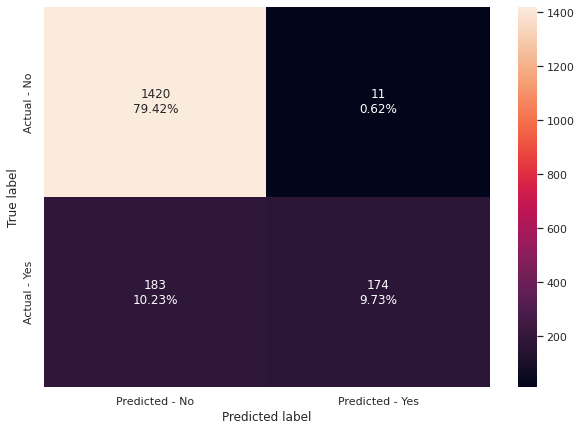

In [93]:
# Calculating different metrics
get_metrics_score(bagg_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bagg_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are exactly same as compared grid search.
- The model is overfitting the data for parameters given by random search.

### **Hyperparameter tuning Random Forest**

#### **GridSearchCV**

In [94]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV

param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_samples': 0.5000000000000001, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 250} 
Score: 0.4663299906211673
CPU times: user 3.69 s, sys: 210 ms, total: 3.9 s
Wall time: 48.8 s


In [95]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=250,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5000000000000001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt',
                                        max_samples=0.5000000000000001,
                                        n_estimators=250, random_state=1))])

Accuracy on training set :  0.9786673058485139
Accuracy on test set :  0.8948545861297539
Recall on training set :  0.8930288461538461
Recall on test set :  0.5014005602240896
Precision on training set :  1.0
Precision on test set :  0.9470899470899471


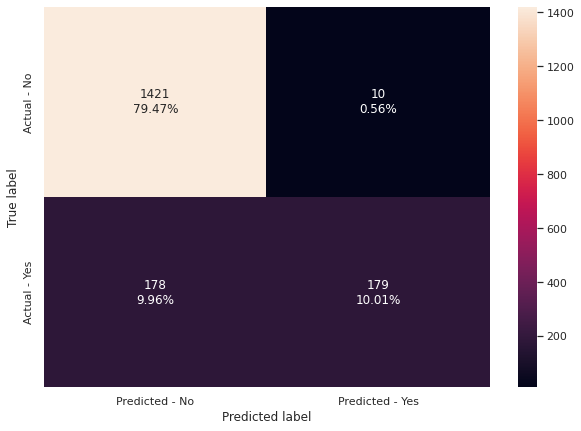

In [96]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- The test recall has increased by ~1.5% as compared to the result from Bagging Classifier.
- The model is overfitting the training data in terms of recall.

#### **RandomizedSearchCV**

In [97]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": [100,150,250],
    "randomforestclassifier__min_samples_leaf": np.arange(1, 6),
    "randomforestclassifier__max_features": [np.arange(0.3, 0.6, 0.1),'sqrt','log2'],
    "randomforestclassifier__max_samples": np.arange(0.2, 0.6, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_samples': 0.5000000000000001, 'randomforestclassifier__max_features': 'sqrt'} with CV score=0.4663299906211673:
CPU times: user 2.05 s, sys: 62.8 ms, total: 2.11 s
Wall time: 12.8 s


In [98]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        n_estimators=250,
        max_features='sqrt',
        random_state=1,
        max_samples=0.5000000000000001,
        min_samples_leaf=1
    ),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='sqrt',
                                        max_samples=0.5000000000000001,
                                        n_estimators=250, random_state=1))])

Accuracy on training set :  0.9786673058485139
Accuracy on test set :  0.8948545861297539
Recall on training set :  0.8930288461538461
Recall on test set :  0.5014005602240896
Precision on training set :  1.0
Precision on test set :  0.9470899470899471


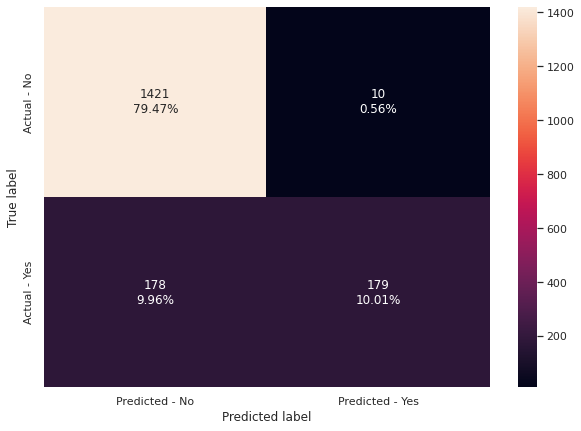

In [99]:
# Calculating different metrics
get_metrics_score(rf_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are exactly same as compared grid search except the base estimator.
- The model is overfitting the data for parameters given by random search.

### **Hyperparameter tuning AdaBoost**

#### **GridSearchCV**

In [100]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 90} 
Score: 0.5744607171199769
CPU times: user 2.79 s, sys: 181 ms, total: 2.97 s
Wall time: 36.4 s


In [101]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=100,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9357622243528284
Accuracy on test set :  0.8752796420581656
Recall on training set :  0.6887019230769231
Recall on test set :  0.4957983193277311
Precision on training set :  0.9845360824742269
Precision on test set :  0.8045454545454546


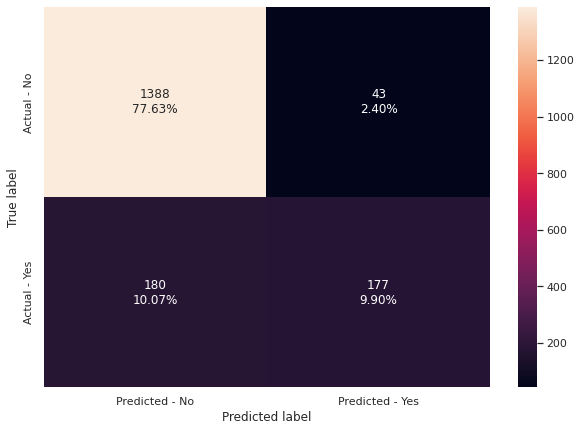

In [102]:
# Calculating different metrics
get_metrics_score(abc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- The test recall has decreased by ~0.5% as compared to the result from Random Forest.
* Model is overfitting in terms of recall.

#### **RandomizedSearchCV**

In [103]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 70, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.5492460861409711:
CPU times: user 1.43 s, sys: 67.7 ms, total: 1.5 s
Wall time: 13.3 s


In [104]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=50,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, random_state=1))])

Accuracy on training set :  0.9048418024928092
Accuracy on test set :  0.860738255033557
Recall on training set :  0.6237980769230769
Recall on test set :  0.49019607843137253
Precision on training set :  0.8606965174129353
Precision on test set :  0.7231404958677686


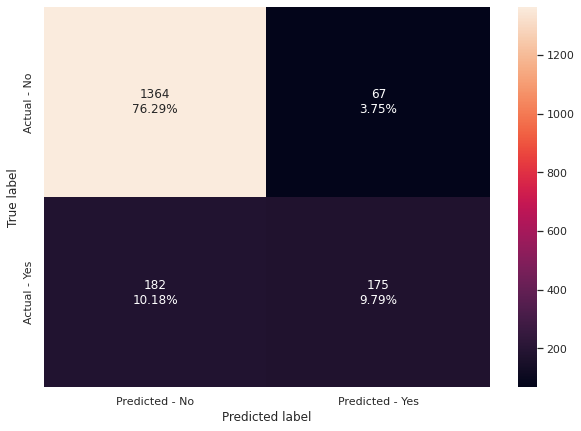

In [105]:
# Calculating different metrics
get_metrics_score(abc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are almost same as compared grid search except the base estimator and estimators.
- The model is overfitting the data for parameters given by random search.

### **Hyperparameter tuning GradientBoosting**

#### **GridSearchCV**

In [106]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__init': DecisionTreeClassifier(random_state=1), 'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_features': 0.5, 'gradientboostingclassifier__n_estimators': 75, 'gradientboostingclassifier__subsample': 0.5} 
Score: 0.5937811124738475
CPU times: user 4.67 s, sys: 399 ms, total: 5.07 s
Wall time: 1min 20s


In [107]:
# Creating new pipeline with best parameters
gbc_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=0.2,
        max_features=0.7,
        n_estimators=125,
        subsample=1,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            learning_rate=0.2, max_features=0.7,
                                            n_estimators=125, random_state=1,
                                            subsample=1))])

Accuracy on training set :  0.9278523489932886
Accuracy on test set :  0.8853467561521253
Recall on training set :  0.6514423076923077
Recall on test set :  0.5098039215686274
Precision on training set :  0.9801084990958409
Precision on test set :  0.8584905660377359


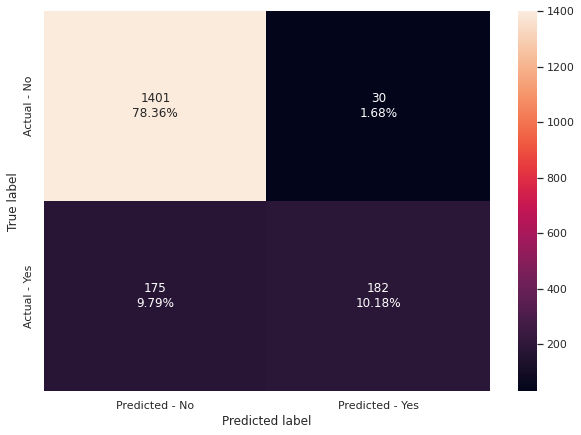

In [108]:
# Calculating different metrics
get_metrics_score(gbc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned1, y_test)

- The test recall has increased by ~1% as compared to the result from Random Forest.
- The model is overfitting the training data in terms of recall.

#### **RandomizedSearchCV**

In [109]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "gradientboostingclassifier__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "gradientboostingclassifier__n_estimators": np.arange(75,150,25),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.5,0.7,1],
    "gradientboostingclassifier__max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 1, 'gradientboostingclassifier__n_estimators': 100, 'gradientboostingclassifier__max_features': 0.5, 'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__init': DecisionTreeClassifier(random_state=1)} with CV score=0.5937811124738475:
CPU times: user 1.4 s, sys: 66.4 ms, total: 1.47 s
Wall time: 15.7 s


In [110]:
# Creating new pipeline with best parameters
gbc_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        init=AdaBoostClassifier(random_state=1),
        learning_rate=0.2,
        max_features=0.7,
        n_estimators=125,
        subsample=1,
        random_state=1,
    ),
)

# Fit the model on training data
gbc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            learning_rate=0.2, max_features=0.7,
                                            n_estimators=125, random_state=1,
                                            subsample=1))])

Accuracy on training set :  0.9278523489932886
Accuracy on test set :  0.8853467561521253
Recall on training set :  0.6514423076923077
Recall on test set :  0.5098039215686274
Precision on training set :  0.9801084990958409
Precision on test set :  0.8584905660377359


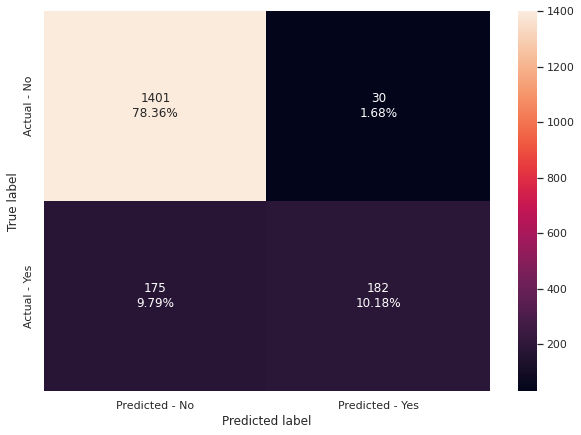

In [111]:
# Calculating different metrics
get_metrics_score(gbc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are exactly same as compared grid search.
- The model is overfitting the data for parameters given by random search.

### **Hyperparameter tuning XGBoost**

#### **GridSearchCV**

In [112]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 1} with CV score=0.9387706514681481:
CPU times: user 23.1 s, sys: 2.11 s, total: 25.2 s
Wall time: 7min 2s


In [113]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=250,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        gamma=1,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='logloss', gamma=1,
                               learning_rate=0.01, n_estimators=250,
                               random_state=1, scale_pos_weight=10,
                               subsample=0.7))])

Accuracy on training set :  0.5083892617449665
Accuracy on test set :  0.5111856823266219
Recall on training set :  0.9567307692307693
Recall on test set :  0.9131652661064426
Precision on training set :  0.2831732479544646
Precision on test set :  0.2788708297690334


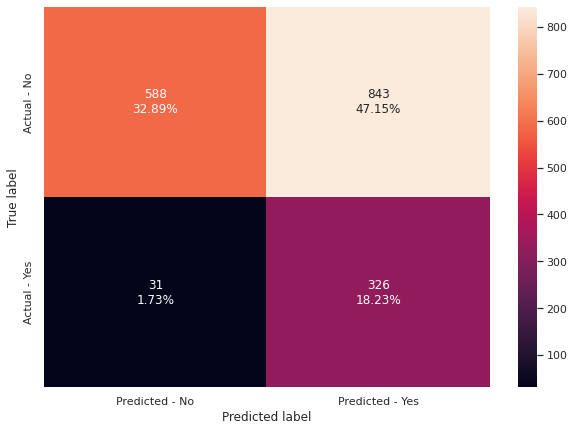

In [114]:
# Calculating different metrics
get_metrics_score(xgb_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has significantly increased by ~40% as compared to the GradientBoost.
* Model has given a generalized performance on training and test set.

#### **RandomizedSearchCV**

In [115]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in RandomSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 5} with CV score=0.9375081162975254:
CPU times: user 863 ms, sys: 71 ms, total: 934 ms
Wall time: 13.5 s


In [116]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=150,
                scale_pos_weight=10,
                learning_rate=0.05,
                gamma=3,
                subsample=0.7,
                eval_metric='logloss',
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(eval_metric='logloss', gamma=3,
                               learning_rate=0.05, n_estimators=150,
                               random_state=1, scale_pos_weight=10,
                               subsample=0.7))])

Accuracy on training set :  0.6493288590604027
Accuracy on test set :  0.6347874720357942
Recall on training set :  0.9555288461538461
Recall on test set :  0.9019607843137255
Precision on training set :  0.3579468707789284
Precision on test set :  0.3425531914893617


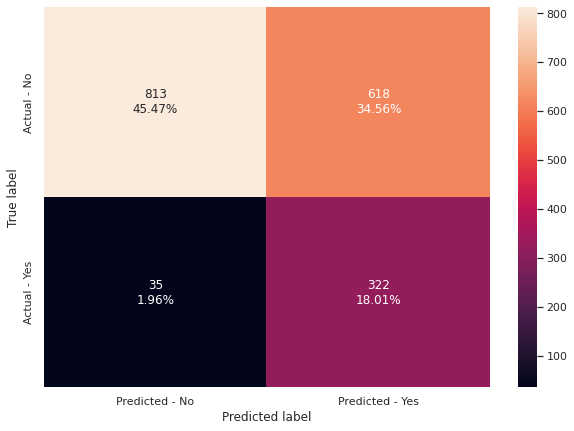

In [117]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Grid search took significantly longer time than random search. This difference would further increase as the number of parameters increases.  
- The parameters from random search are different as compared grid search.
- The model has given a generalized performance on training and test set.

In [118]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [119]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [120]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [121]:
# defining list of models
models = [dtree_tuned1,dtree_tuned2,bagg_tuned1,bagg_tuned2,rf_tuned1,rf_tuned2,abc_tuned1,abc_tuned2,gbc_tuned1,gbc_tuned2,xgb_tuned1, xgb_tuned2]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [122]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            'Logistic Regression on Oversampled data',
            'Logistic Regression-Regularized (Oversampled data)',
            'Logistic Regression on Undersampled data',
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "Bagging Classifier with GridSearchCV",
            "Bagging Classifier with RandomizedSearchCV",
            "Random Forest with GridSearchCV",
            "Random Forest with RandomizedSearchCV",
            "AdaBoost with GridSearchCV",
            "AdaBoost Tree with RandomizedSearchCV",
            "GradientBoost with GridSearchCV",
            "GradientBoost Tree with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.801,0.801,0.014,0.006,0.545,1.000
1,Logistic Regression on Oversampled data,0.617,0.602,0.627,0.552,0.615,0.263
2,Logistic Regression-Regularized (Oversampled d...,0.513,0.688,0.208,0.227,0.533,0.223
3,Logistic Regression on Undersampled data,0.545,0.725,0.264,0.224,0.603,0.272
4,Decision Tree with GridSearchCV,0.849,0.834,0.298,0.255,0.846,0.746
5,Decision Tree with RandomizedSearchCV,0.840,0.834,0.261,0.238,0.807,0.773
6,Bagging Classifier with GridSearchCV,0.994,0.891,0.971,0.487,1.000,0.941
7,Bagging Classifier with RandomizedSearchCV,0.994,0.891,0.971,0.487,1.000,0.941
8,Random Forest with GridSearchCV,0.979,0.895,0.893,0.501,1.000,0.947
9,Random Forest with RandomizedSearchCV,0.979,0.895,0.893,0.501,1.000,0.947


- The xgboost model tuned using GridSearchCV is giving the best test recall of 0.91 and an overall generalized performance.
- Let's see the feature importance from the tuned **`xgboost model`** 

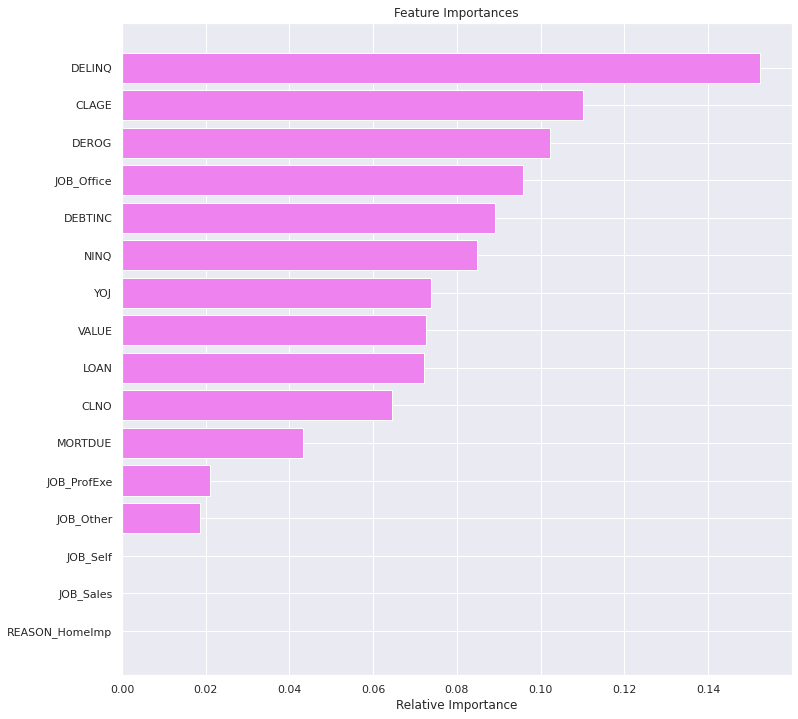

In [123]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* **DELINQ** is the most important variable in predicting Loan Default followed by **CLAGE**, **DEROG**, **JOB_Office**, **DEBTINC** and **NINQ**.

## **Business Insights & Recommendations**

* We have been able to build a predictive model:

  a) that bank can deploy this model to identify customers who will default paying their loan.
  
  b) that the bank can use to find the key causes or the main reasons that drive attrition. 
  
  c) based on, which appropriate actions can a bank take in order to offer loans to customers.
  

* Factors that drive the attrition - DELINQ is the most important variable in predicting Loan Default followed by CLAGE, DEROG, JOB_Office, DEBTINC and NINQ.

* DELINQ: The number of delinquent credit lines is the most significant factor for the defaulters. If the client does not make the minimum required payments 30 to 60 past day more than 5 times, that means that he will default.

* CLAGE: As second most important factor is the age on months of the oldest credit line. Customers with the oldest credit lines use to default.

* DEROG: Number of major derogatory reports is also an important factor. If we have more than 6 reports, is almost sure that the client will default.

* JOB_Office: Surprisingly a Job description is also a factor or better to say a matter of confidence. The clients who defaulted less, are those who are working in an office, in addition to other clients with better income.

* DEBTINC: The Debt-to-income ratio and the ability of the borrower to repay the loan is as expected another considerable factor too.

* The bank should consider it’s strategy on clients job as the results shows that is significant factor that the clients who repay their loans are those with more safe position in addition with those with more income.

*  The reason of a loan request should not be consider necessarily as a factor to default.

* Targeting at clients income in relationship with their Job stability and  their tendency to serious delinquency  could minimize in a large scale the percentage of loses from non repayable loans. 





In [124]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(xgb_tuned1, open(filename, 'wb'))

In [125]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [126]:
X_test

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
4911,25900,42105.000,73249.000,2.000,0,0,109,3,22,31.810,0,0,1,0,0,0
964,9300,73252.000,100537.000,2.000,0,0,99,0,26,34.510,0,0,0,1,0,0
1638,11700,56441.000,86987.000,17.000,0,0,198,0,16,33.930,1,0,1,0,0,0
5452,32400,51220.000,106361.000,3.000,0,0,172,2,24,36.490,0,1,0,0,0,0
4187,21800,107271.000,161219.000,15.000,0,0,187,0,26,31.560,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,21000,42000.000,67000.000,7.000,0,0,66,2,19,26.780,0,0,1,0,0,0
1747,12000,15231.000,42845.010,6.500,0,1,65,2,18,26.260,0,1,0,0,0,0
5147,27600,129311.000,188143.000,1.000,0,0,122,1,39,30.470,0,0,0,0,0,0
4615,24200,49798.000,67458.000,6.000,0,0,68,2,18,36.460,0,0,1,0,0,0


In [127]:
X_test.loc[3]

LOAN              1500.000
MORTDUE          48080.600
VALUE            56090.800
YOJ                  6.800
DEROG                0.000
DELINQ               0.000
CLAGE              110.000
NINQ                 0.000
CLNO                10.000
DEBTINC             29.510
REASON_HomeImp       1.000
JOB_Office           0.000
JOB_Other            1.000
JOB_ProfExe          0.000
JOB_Sales            0.000
JOB_Self             0.000
Name: 3, dtype: float64

In [128]:
np.array(X_test.iloc[3]).reshape(1,-1)

array([[3.24000e+04, 5.12200e+04, 1.06361e+05, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 1.72000e+02, 2.00000e+00, 2.40000e+01, 3.64900e+01,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00]])

In [129]:
loaded_model.predict(np.array(X_test.iloc[3]).reshape(1,-1))

array([1])

In [130]:
def pred(data, model):
    out = model.predict(data)
    return out


Accuracy on training set :  0.5083892617449665
Accuracy on test set :  0.5111856823266219
Recall on training set :  0.9567307692307693
Recall on test set :  0.9131652661064426
Precision on training set :  0.2831732479544646
Precision on test set :  0.2788708297690334


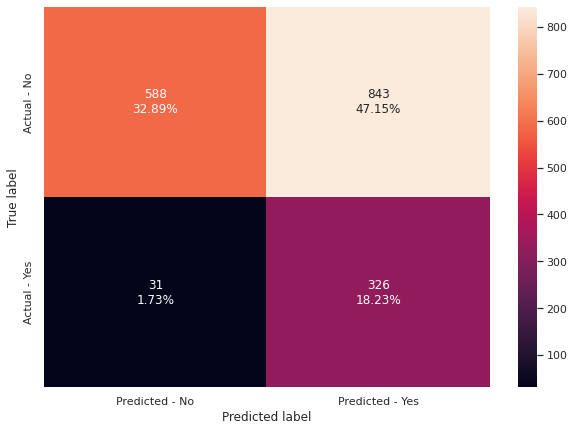

In [131]:
# Calculating different metrics
get_metrics_score(loaded_model,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(loaded_model, y_test)

# !pip list

In [132]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        6.0.0
blis

# %history

In [133]:
%history

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# To supress warnings

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import numpy as np                                      # Import numpy
import pandas as pd                                     # Import pandas

# Libraries to help with data visualization

import seaborn as sns                                   # Import seaborn
import matplotlib.pyplot as plt                         # Import Matplotlib 
sns.set()                                               # Background style for plots

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute im